In [1]:
reviews_path = "..\\..\\..\\..\\data\\reviews.csv"
talents_path = "..\\..\\..\\..\\data\\talents.csv"
users_path = "..\\..\\..\\..\\data\\users.csv"
tags_path = "..\\..\\..\\..\\data\\tags.csv" 

In [2]:
import pandas as pd
import numpy as np

reviews_df = pd.read_csv(reviews_path)
talents_df = pd.read_csv(talents_path)
users_df = pd.read_csv(users_path)
tags_df = pd.read_csv(tags_path)

In [15]:
from sklearn.preprocessing import OneHotEncoder

# One hot encoding for tags
numpy_tags = tags_df['tag'].to_numpy().reshape(-1, 1)

onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded_tags = onehot_encoder.fit_transform(numpy_tags)

# the talent tags is a list of lists of tags for each talent

talent_tags = talents_df['talent_tags'].str.split('|').to_numpy()

# get average rating for each talent

talents_average_rating = reviews_talents.groupby('talent_id')['rating'].mean()

# add the average rating to the talents dataframe

talents_df['average_rating'] = talents_average_rating[talents_df['talent_id']].to_numpy()



# one hot encoding for talent tags

onehot_encoded_talent_tags = []

for talent_tag in talent_tags:
    talent_tag = [tag for tag in talent_tag if tag != '']
    talent_tag = np.array(talent_tag).reshape(-1, 1)

    onehot_encoded_talent_tag = onehot_encoder.transform(talent_tag)
    # combine the one hot encoded talent tags into one array
    onehot_encoded_talent_tag = np.sum(onehot_encoded_talent_tag, axis=0)
    onehot_encoded_talent_tags.append(onehot_encoded_talent_tag)

onehot_encoded_talent_tags = np.array(onehot_encoded_talent_tags)

onehot_encoded_talent_tags.shape

(509, 191)

In [10]:
# Test the Encoding

user_1 = users_df.iloc[0]

user_1_talent_tags = user_1['user_tags']

user_1_talent_tags = [tag for tag in user_1_talent_tags.split('|') if tag != '']

user_1_talent_tags = onehot_encoder.transform([[tag] for tag in user_1_talent_tags])

user_1_talent_tags = np.sum(user_1_talent_tags, axis=0)


In [11]:
# word embedding for talent tags
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

talent_tags = talents_df['talent_tags'].str.replace('|', ' ')

talent_tags = talent_tags.to_numpy()

vectorizer.fit(talent_tags)

talent_tags = vectorizer.transform(talent_tags)

talent_tags



<509x218 sparse matrix of type '<class 'numpy.float64'>'
	with 2657 stored elements in Compressed Sparse Row format>

In [12]:
# PCA for talent tags


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
tags_encoded = mlb.fit_transform(talent_tags.toarray())
print(len(tags_encoded[1]))
print(tags_encoded[1])
print(mlb.classes_)

In [113]:
# kmeans clustering for talent tags

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# elbow method to find the best k

import matplotlib.pyplot as plt

wcss = []

r_k = range(1, onehot_encoded_talent_tags.shape[0] + 1)

for i in r_k:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(onehot_encoded_talent_tags)
    print("Fitting kmeans for k = " + str(i) + " with inertia = " + str(kmeans.inertia_))
    wcss.append(kmeans.inertia_)


Fitting kmeans for k = 1 with inertia = 2273.0687622789787
Fitting kmeans for k = 2 with inertia = 2108.1683826333283
Fitting kmeans for k = 3 with inertia = 1973.9478981735742
Fitting kmeans for k = 4 with inertia = 1900.2936039552435
Fitting kmeans for k = 5 with inertia = 1844.1207954183715
Fitting kmeans for k = 6 with inertia = 1792.320850827015
Fitting kmeans for k = 7 with inertia = 1766.9864055062794
Fitting kmeans for k = 8 with inertia = 1729.6601660160857
Fitting kmeans for k = 9 with inertia = 1693.840809881356
Fitting kmeans for k = 10 with inertia = 1667.4413748454251
Fitting kmeans for k = 11 with inertia = 1649.9509059186037
Fitting kmeans for k = 12 with inertia = 1625.464933865052
Fitting kmeans for k = 13 with inertia = 1602.5255067473845
Fitting kmeans for k = 14 with inertia = 1592.1972252327273
Fitting kmeans for k = 15 with inertia = 1577.7619858910532
Fitting kmeans for k = 16 with inertia = 1559.3794027603308
Fitting kmeans for k = 17 with inertia = 1541.885820

21

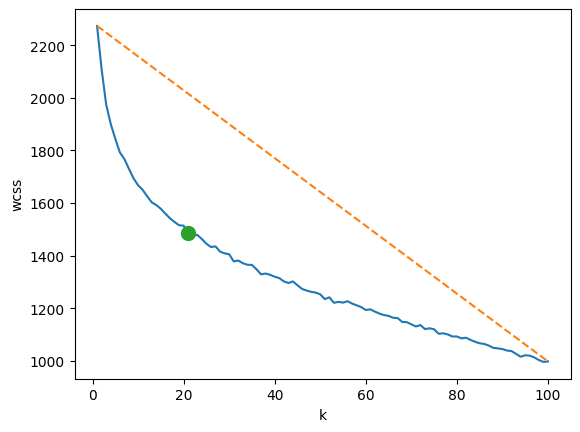

In [285]:

result = pd.DataFrame({'k': r_k, 'wcss': wcss})

def getElbow(r_k, wcss):
    x1, y1 = r_k[0], wcss[0]
    x2, y2 = r_k[len(r_k)-1], wcss[len(wcss)-1]
    
    distances = []
    for i in range(len(r_k)):
        x0 = r_k[i]
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    plt.plot(r_k, wcss)
    plt.plot([x1, x2], [y1, y2], '--')
    plt.plot(r_k[distances.index(max(distances))], wcss[distances.index(max(distances))], marker='o', markersize=10, label="Elbow")

    plt.xlabel('k')

    plt.ylabel('wcss')

    return distances.index(max(distances)) + 1

copy_result = result.copy()
start_index = 0
slice_index = 100

copy_rk = copy_result['k'].to_numpy()
copy_wcss = copy_result['wcss'].to_numpy()

copy_rk = copy_rk[start_index:slice_index]

copy_wcss = copy_wcss[start_index:slice_index]

k = getElbow(copy_rk, copy_wcss)

k

In [287]:

kmeans = KMeans(n_clusters=k, init='k-means++')

kmeans.fit(onehot_encoded_talent_tags)

talent_tags_clusters = kmeans.predict(onehot_encoded_talent_tags)

talent_tags_clusters

array([17, 18,  8, 13,  3, 11, 10, 19,  8, 19, 13, 17,  0,  5, 14,  2,  5,
       17, 18, 14, 19,  6,  0,  5,  1, 13,  0,  3, 16,  5, 19, 14, 17, 18,
        3,  0,  7, 13, 16, 19, 17, 16, 14,  5, 13,  7, 19,  3, 17,  5,  0,
        7, 13, 19, 17, 17, 20, 13, 16, 18,  5,  3, 17, 17,  7,  7,  3, 20,
       18, 15, 17, 13,  3, 17,  5,  7,  0,  1, 16,  6,  6,  7, 15, 18,  7,
        7,  6,  5,  5,  4,  5,  7,  3, 14, 19, 15,  7,  0, 13,  7,  4,  7,
        5,  0, 13, 15,  3,  9,  4, 20, 13,  7,  3, 13,  4,  3,  8, 15,  3,
        2, 12, 13, 17, 16,  4,  7, 13, 15, 10, 12, 15,  7, 18,  3, 15, 18,
        4,  7, 15,  7, 15, 19, 15,  3,  6, 11, 13, 15, 10, 13,  5,  2,  6,
        0, 13,  4,  6, 15,  6,  5,  7,  4, 13,  4, 15,  7,  4, 15,  4, 10,
        4,  2,  3,  7, 10,  7, 17, 10,  8, 10, 17,  1, 18,  3,  2,  5, 19,
        8,  0, 15,  7, 19, 16, 17,  6, 19,  5,  0,  5,  0,  7,  1,  0,  7,
        9, 16,  0,  6,  5, 18,  6,  5, 13,  7, 15,  7, 18,  0, 12, 13,  9,
       14,  7,  1, 18, 15

In [288]:
# count the number of talents in each cluster

talent_tags_clusters_count = np.zeros(k)

for cluster in talent_tags_clusters:
    talent_tags_clusters_count[cluster] += 1

for i in range(k):
    print("Cluster " + str(i) + " : " + str(talent_tags_clusters_count[i]))

Cluster 0 : 48.0
Cluster 1 : 22.0
Cluster 2 : 23.0
Cluster 3 : 18.0
Cluster 4 : 22.0
Cluster 5 : 26.0
Cluster 6 : 19.0
Cluster 7 : 44.0
Cluster 8 : 15.0
Cluster 9 : 27.0
Cluster 10 : 26.0
Cluster 11 : 16.0
Cluster 12 : 8.0
Cluster 13 : 46.0
Cluster 14 : 21.0
Cluster 15 : 34.0
Cluster 16 : 12.0
Cluster 17 : 29.0
Cluster 18 : 22.0
Cluster 19 : 16.0
Cluster 20 : 15.0


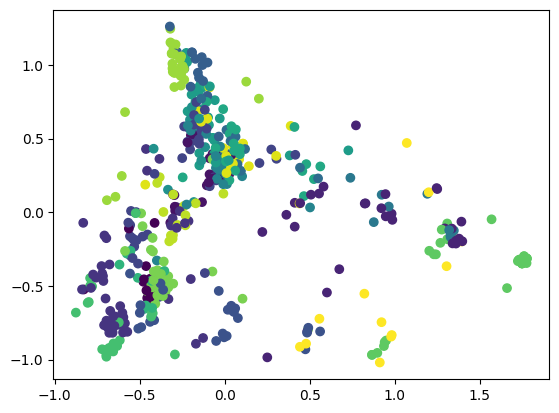

In [234]:
# plot the clusters

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(onehot_encoded_talent_tags)

talent_tags_pca = pca.transform(onehot_encoded_talent_tags)

talent_tags_pca

plt.scatter(talent_tags_pca[:, 0], talent_tags_pca[:, 1], c=talent_tags_clusters)

In [279]:
# get outliers from the clusters (cluster with less than 5 talents)

outliers = []

for i in range(k):
    if talent_tags_clusters_count[i] < 5:
        outliers.append(i)

for o in outliers:
    print("Outlier " + str(o) + " : " + str(talent_tags_clusters_count[o]))
    
len(outliers)

Outlier 3 : 1.0
Outlier 5 : 3.0
Outlier 7 : 4.0
Outlier 9 : 3.0
Outlier 11 : 2.0
Outlier 14 : 2.0
Outlier 17 : 4.0
Outlier 18 : 4.0
Outlier 31 : 3.0
Outlier 32 : 3.0
Outlier 36 : 4.0
Outlier 37 : 1.0
Outlier 40 : 2.0
Outlier 44 : 2.0
Outlier 45 : 3.0
Outlier 46 : 1.0
Outlier 48 : 2.0
Outlier 49 : 3.0
Outlier 51 : 2.0
Outlier 56 : 1.0
Outlier 58 : 4.0
Outlier 59 : 3.0
Outlier 60 : 3.0
Outlier 62 : 2.0
Outlier 63 : 3.0
Outlier 64 : 3.0
Outlier 65 : 4.0
Outlier 66 : 3.0
Outlier 67 : 3.0
Outlier 68 : 2.0
Outlier 71 : 1.0
Outlier 72 : 1.0
Outlier 73 : 1.0
Outlier 75 : 3.0
Outlier 78 : 1.0
Outlier 79 : 1.0
Outlier 80 : 2.0
Outlier 81 : 2.0
Outlier 83 : 1.0
Outlier 84 : 1.0
Outlier 85 : 1.0
Outlier 86 : 2.0
Outlier 87 : 2.0
Outlier 88 : 2.0
Outlier 89 : 3.0
Outlier 90 : 3.0
Outlier 91 : 2.0
Outlier 92 : 3.0


48

In [289]:
# get the talents in the outliers

outliers_talents = []

for i in range(len(talent_tags_clusters)):
    if talent_tags_clusters[i] in outliers:
        outliers_talents.append(talents_df.iloc[i])
outliers_talents = pd.DataFrame(outliers_talents)

outliers_talents

,talent_id,talent_name,talent_gender,talent_birth_date,talent_age,talent_location,talent_tags,talent_description,average_rating
0,fc0f6e4b-c397-40a4-a24c-d08b92aedc45,Pribadi Anwar Wicaksono,L,24/4/1992,31,"Banten, Cilegon",Badminton|Berjiwa petualang|Kpopers|Hiking|Ola...,"Saya sangat menyukai Kpop, girlband favorit sa...",3.000000
1,674c14d8-ed13-471a-aabf-ceef4e5bc44b,Perdana Anshari,L,10/3/2005,18,"Kalimantan Utara, Tarakan",Desain|Inovatif|Optimis|Seniman|Kreatif,Saya adalah seorang seniman visual yang mencin...,4.000000
4,d7a31753-7f7a-4d3a-80ec-bca26e578735,Adisyafitri Oky Septasya,P,12/7/1990,33,"Kalimantan Timur, Samarinda",Ambisius|Membaca|Cerdas|Pengajar|Visioner,Pengajar bahasa Inggris yang juga pencinta lit...,4.500000
5,89341cbe-65d3-46bd-b905-32becfbbf0a4,Muhammad Taufik,L,10/11/2003,20,"Sulawesi Selatan, Makassar",Teknologi|Optimis|Gamers|Manajemen|Dermawan,Saya adalah seorang gamer sejati yang gemar be...,4.000000
11,ddc39acb-d29b-43f0-abcd-f54fe7be2904,Aprilia Wanda Habibah Dhea,P,2/9/2002,21,"Jawa Barat, Cimahi",Binaraga|Jogging|Gym|Cerdas|Olahraga,Pengajar kebugaran yang berkomitmen untuk memb...,4.000000
...,...,...,...,...,...,...,...,...,...
499,ab59d7c4-a279-4042-b3f6-ac0e412136b3,Aninda Anggraeni Yusuf,P,7/1/1979,44,"Kalimantan Tengah, Kotawaringin Barat",Cerdas|Pengajar|Basket|Ramah|Olahraga,Seorang mantan pemain basket yang kini menjadi...,5.000000
502,277fe1d3-30ac-4b72-a0c9-3e28079638c4,Arisandi Hendrian,L,29/11/1983,40,"Lampung, Metro",Jogging|Self development|Cerdas|Pengajar|Ramah,Seorang pengajar matematika tingkat perguruan ...,3.666667
503,952cb4e1-fb04-47ea-ac27-f02c7dada141,Marisa Yasmine,P,27/4/1988,35,"Kalimantan Selatan, Banjarmasin",Ambisius|Sutradara|Kreatif|Penulis|Film,Seorang sutradara film yang juga menulis naska...,4.800000
504,61601bd4-79b7-4399-b6b3-4bad407c2e06,Iqbal Syahnur Muhammad Septian,L,22/1/1999,24,"Maluku Utara, Tidore Kepulauan",Fashion|Kreatif|Model|Perfeksionis|Stylist,Seorang model yang juga memiliki keahlian seba...,3.000000


In [281]:
# cluster labels for talents

talent_tags_cluster_labels = kmeans.labels_

print(talent_tags_cluster_labels.shape)

(509,)


In [290]:
# recommendation system for user 1

user_1 = users_df.iloc[1]

raw_user_1_talent_tags = user_1['user_tags']

user_1_talent_tags = [tag for tag in raw_user_1_talent_tags.split('|') if tag != '']

user_1_talent_tags = np.array([tag for tag in user_1_talent_tags])

user_1_talent_tags = onehot_encoder.transform([[tag] for tag in user_1_talent_tags]).sum(axis=0).reshape(1, -1)
print(user_1_talent_tags)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [283]:
# predict the cluster for user 1

user_1_talent_tags_cluster = kmeans.predict(user_1_talent_tags)

print("cluster for user 1 : " + str(user_1_talent_tags_cluster))

cluster for user 1 : [7]


In [291]:
# get the talents in the same cluster as user 1

talents_in_same_cluster = talents_df.iloc[np.where(talent_tags_clusters == user_1_talent_tags_cluster[0])]

print(raw_user_1_talent_tags)
print(talents_in_same_cluster.shape)
talents_in_same_cluster 


Pecinta alam|Membaca|Kritis|Memasak|Ngopi
(44, 9)


,talent_id,talent_name,talent_gender,talent_birth_date,talent_age,talent_location,talent_tags,talent_description,average_rating
36,f842424e-f907-4a51-9240-a446a6fe065c,Taufik Haq,L,11/1/2007,16,"Nusa Tenggara Barat, Mataram",Aktor/Aktris|Akting|Percaya diri|Kreatif|Film,Aktor/Aktris dan pecinta seni panggung. Saya b...,3.666667
45,c3318550-6af5-42a2-86b3-08498b54c652,Restiantoro Nainggolan,L,15/9/1998,25,"Jawa Timur, Mojokerto",Sabar|Membaca|Filsafat|Kreatif|Model,Seorang desainer grafis yang memiliki keahlian...,4.000000
51,83feee56-1ad7-4bc1-bdb6-af716bc96d0c,Sultan Permadi Rega,L,3/10/2004,19,"Sumatera Utara, Tebing Tinggi",Sutradara|Akting|Kreatif|Menyanyi|Film,Saya adalah seorang aktor yang memiliki pengal...,5.000000
64,4740e9c8-2fdf-48a5-b7f2-c45da2f25339,Bilianindi Wahyuningrum Marisa,P,15/1/1986,37,"Sulawesi Utara, Kotamobagu",Kreatif|Videografi|Bekerja|Independen|Intelektual,Pembuat konten yang aktif di platform YouTube....,3.000000
65,22cf56e3-c73d-4678-a176-6478d9cbc59b,Nur Arifiananda Saptiani Reninda,P,1/10/1984,39,"Kalimantan Selatan, Kotabaru",Memanjat|Meditasi|Kreatif|Arsitek|Tidur,Seorang desainer interior dengan keahlian dala...,4.000000
75,85b5f43e-0e28-468a-bbdc-515d99c09a66,Wijaya Adam Melkisedek,L,24/6/1996,27,"Papua Barat Daya, Sorong",Belanja|Animator|Kreatif|Bekerja|Fleksibel,Animator berbakat dengan fokus pada animasi 3D...,4.000000
81,53421c7b-5c31-4518-baa6-afd07473c8fb,Aulia Asyhari Amalanda,P,23/7/2002,21,"Kalimantan Tengah, Kotawaringin Barat",Memanjat|Optimis|Pembuat perhiasan|Kreatif|Ramah,Pembuat konten yang aktif di platform YouTube....,4.000000
84,9d7c4c25-b800-4ac3-baf8-aeab68a2c462,Yudha Ishaq,L,17/6/2003,20,"Sumatera Barat, Padang Panjang",Koki|Memasak|Cerdas|Kreatif|Ramah,Koki dengan keahlian dalam memasak masakan tra...,4.000000
85,a88e96b9-c2d2-439e-9ace-71afddef6486,Ariyadi Mutiara Purnama Sambouw,P,25/1/1994,29,"Jawa Timur, Probolinggo",Ahli ekologi|Percaya diri|Kreatif|Trading|3D M...,Podcaster yang membahas topik pengembangan dir...,3.000000
91,63033218-389c-4377-854c-dd415337b623,Sherina Nahda Pare,P,27/2/1987,36,"Nusa Tenggara Barat, Mataram",Editor|Disiplin|Kreatif|Perfeksionis|Ramah,Editor video yang berpengalaman dalam produksi...,3.000000


In [292]:
# sort the talents in the same cluster by average rating

talents_in_same_cluster = talents_in_same_cluster.sort_values(by=['average_rating'], ascending=False)


print(raw_user_1_talent_tags)
talents_in_same_cluster.head(10)

Pecinta alam|Membaca|Kritis|Memasak|Ngopi


,talent_id,talent_name,talent_gender,talent_birth_date,talent_age,talent_location,talent_tags,talent_description,average_rating
139,169b2050-8f9b-47d1-a46a-46cb97279f62,Sapira Azzahra,P,20/3/1990,33,"Sumatera Selatan, Palembang",Ambisius|Seniman|Animator|Kreatif|Ramah,Animator 3D dengan keahlian dalam modeling dan...,5.000000
336,dbb9bb27-5f8f-4b45-9977-4cb7a46f7934,Roiyan Fathur Salim Paul,L,20/6/2001,22,"Jawa Timur, Kediri",Animator|Disiplin|Kreatif|Film|Intelektual,Seorang animator karakter dengan fokus pada pe...,5.000000
173,8d9960c9-0043-4e98-b9fd-3b9a08ac945e,Agnesty Sutrisno,P,13/12/1983,40,"Kalimantan Barat, Pontianak",Memanjat|Humoris|Desainer interior|Kreatif|Ramah,Desainer grafis dengan keahlian dalam ilustras...,5.000000
308,bcbbabdc-8c45-436c-9b90-692ebd1d9cd2,Karina Firda,P,25/10/1980,43,"Sumatera Selatan, Lubuk Linggau",Cerdas|Disiplin|Sosmed|Kreatif|Diplomat,Seorang penyiar radio dengan suara yang merdu ...,5.000000
131,13132a45-bac1-454f-85d2-300d909ed895,Elisatriani Rezyka,P,4/5/2007,16,"Jawa Timur, Pasuruan",Surfing|Arkeolog|Disiplin|Kreatif|Ramah,Kreator konten pendidikan yang menghasilkan ma...,5.000000
111,6a55aaf6-4c71-4fba-ab7b-cf79c6bd22b9,Husein Hamid Salim Wafi,L,10/9/2007,16,"Sulawesi Utara, Kotamobagu",Mendaki|Optimis|Animator|Kreatif|Bekerja,Animator karikatur dengan keahlian dalam anima...,5.000000
289,fd1b1b7a-8995-43b1-a8e0-b28e9343e0d3,Rana Hutami,P,26/8/1983,40,"Jambi, Jambi",Fashion|Membaca|Anak Senja|Kreatif|Bekerja,Pembaca buku yang juga memiliki kecintaan pada...,5.000000
51,83feee56-1ad7-4bc1-bdb6-af716bc96d0c,Sultan Permadi Rega,L,3/10/2004,19,"Sumatera Utara, Tebing Tinggi",Sutradara|Akting|Kreatif|Menyanyi|Film,Saya adalah seorang aktor yang memiliki pengal...,5.000000
262,12d2d756-5079-4093-944e-c330b95c926b,Selamat Ari Rizal Rahman,L,10/3/1978,45,"Kalimantan Timur, Bontang",Musisi|Kreatif|Bekerja|Kesehatan|Olahraga,Seorang atlet yang juga memiliki ketertarikan ...,4.666667
222,c68df494-6772-47f6-ae42-3f1389e1d0d0,Gunawan Firgiawan Georgya,L,1/6/2002,21,"Jawa Tengah, Semarang",Editor|Animator|Kreatif|Videografi|Perfeksionis,"Profesional dalam penyuntingan video, animasi,...",4.500000
